<a href="https://colab.research.google.com/github/lucas29951/lucas29951.github.com/blob/main/argprog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

##[Keras](https://keras.io)

Es una biblioteca para trabajar con Redes Neuronales de Código Abierto escrita en Python. Es capaz de ejecutarse sobre TensorFlow entre otras librerías. ​Está especialmente diseñada para posibilitar la experimentación con redes de Aprendizaje Profundo.

##[TensorFlow](https://www.tensorflow.org/?hl=es-419)

Es una biblioteca de software gratuita y de código abierto para el aprendizaje automático y la inteligencia artificial.

##[NumPy](https://www.numpy.org/)
Es una extensión de Python, que le agrega mayor soporte para vectores y matrices, constituyendo una biblioteca de funciones matemáticas de alto nivel para operar con esos vectores o matrices.

##[Matplotlib ](https://matplotlib.org/3.1.1/index.html)
Es una libreria de ploteo 2D de Python que produce figuras de alta calidad que pueden ser utilizadas directamente en publicaciones tanto digitales como impresas además de poder añadirse a entornos interactivos en todas las plataformas.

Matplotlib se puede usar en scripts de Python, los shells de Python e [IPython](https://ipython.org/), Jupyter, google colab y muchos mas.

In [ ]:
#Base de datos
fashion_mnist = keras.datasets.fashion_mnist

(train_inputs, train_labels), (test_inputs, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


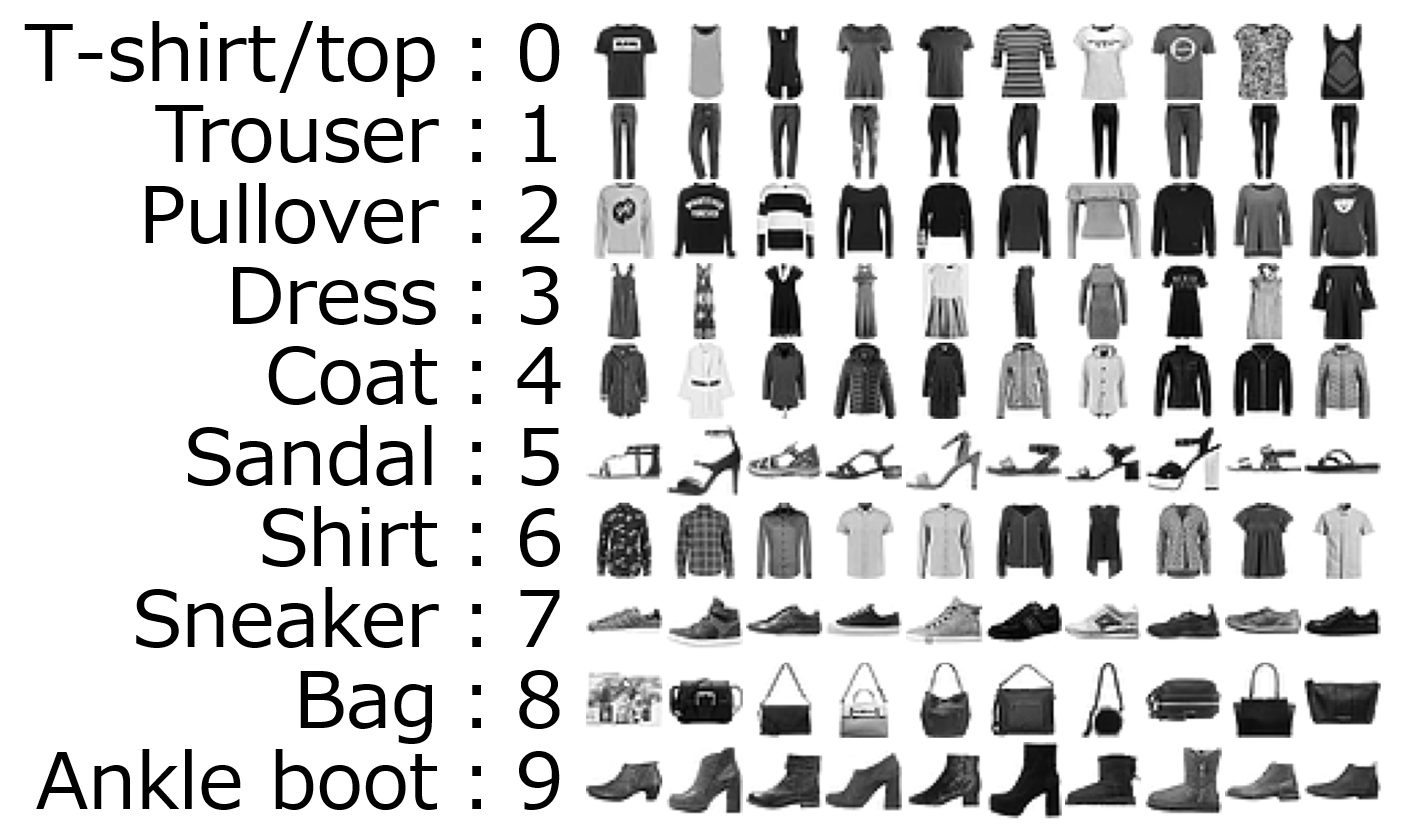

In [ ]:
#Clases
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_inputs.shape

(60000, 28, 28)

In [ ]:
test_inputs.shape

(10000, 28, 28)

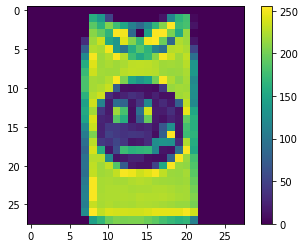

[0, 1, 0.1]

In [ ]:
plt.figure()
plt.imshow(train_inputs[101])
plt.colorbar()
plt.grid(False)
plt.show()
[0,1,0.1]

In [ ]:
#Normalizacion 
train_inputs = train_inputs / 255.0
test_inputs = test_inputs / 255.0

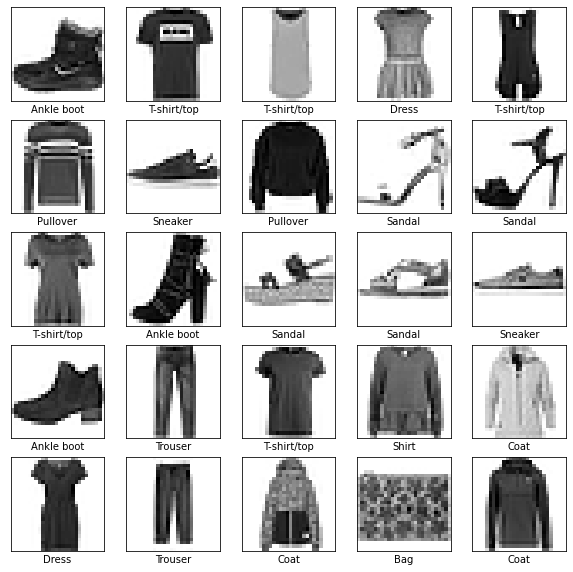

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_inputs[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

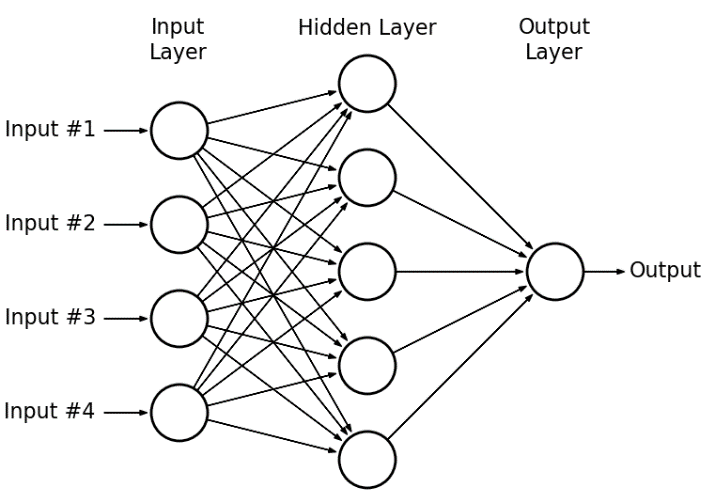

In [ ]:
#Creacion del modelo
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model.fit(train_inputs, train_labels,                  
                  epochs=5,
                  batch_size=100,
                  shuffle=True,
                  validation_data=(test_inputs, test_labels))

Epoch 1/5
600/600 [==============================] - 6s 8ms/step - loss: 0.5367 - accuracy: 0.8146 - val_loss: 0.4617 - val_accuracy: 0.8332
Epoch 2/5
600/600 [==============================] - 4s 6ms/step - loss: 0.3928 - accuracy: 0.8620 - val_loss: 0.3899 - val_accuracy: 0.8628
Epoch 3/5
600/600 [==============================] - 4s 6ms/step - loss: 0.3535 - accuracy: 0.8732 - val_loss: 0.4007 - val_accuracy: 0.8577
Epoch 4/5
600/600 [==============================] - 3s 6ms/step - loss: 0.3266 - accuracy: 0.8830 - val_loss: 0.3670 - val_accuracy: 0.8658
Epoch 5/5
600/600 [==============================] - 3s 5ms/step - loss: 0.3116 - accuracy: 0.8870 - val_loss: 0.3590 - val_accuracy: 0.8737


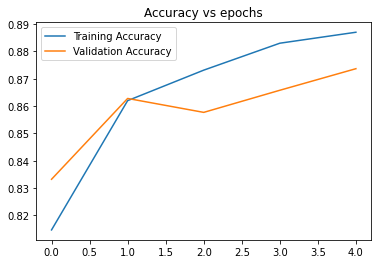

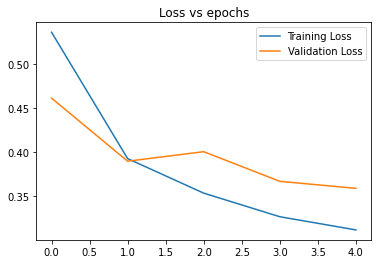

In [ ]:
plt.figure()
plt.title("Accuracy vs epochs")
plt.plot( history.history['accuracy'] )
plt.plot( history.history['val_accuracy'] )
plt.legend(['Training Accuracy', 'Validation Accuracy'])


plt.figure()
plt.title("Loss vs epochs")
plt.plot( history.history['loss'] )
plt.plot( history.history['val_loss'] )
plt.legend(['Training Loss', 'Validation Loss']);

In [ ]:
predictions = model.predict(test_inputs)

313/313 [==============================] - 1s 1ms/step


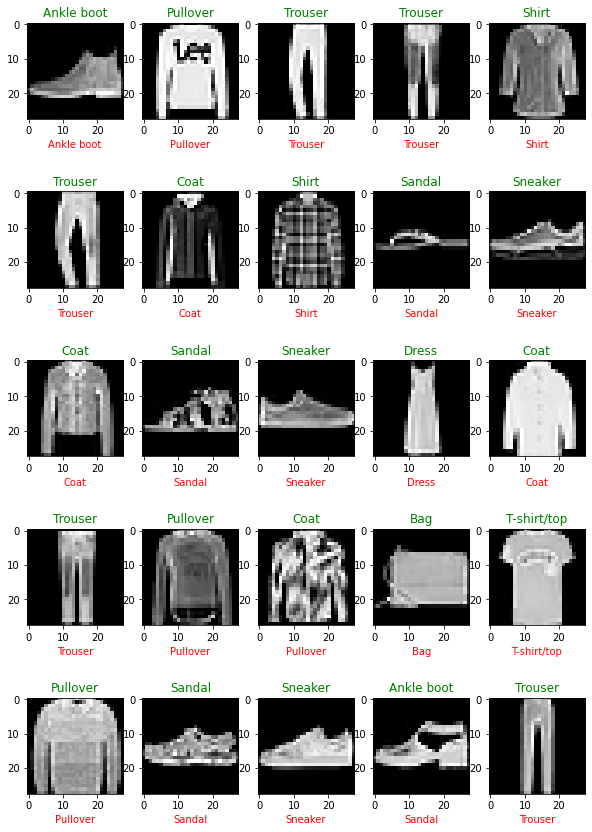

In [ ]:
plt.figure(figsize=(10,15))
for i in range(25):
    plt.subplot(5,5,i+1)

    plt.imshow(test_inputs[i].reshape(28,28), 'gray')
    plt.title(class_names[test_labels[i]], color='g')
    plt.xlabel(class_names[np.argmax(predictions[i])], color='r')
    
plt.show()

[Matriz de Confusión](https://en.wikipedia.org/wiki/Confusion_matrix)

Permite la visualización del desempeño de un algoritmo que se emplea en aprendizaje supervisado.

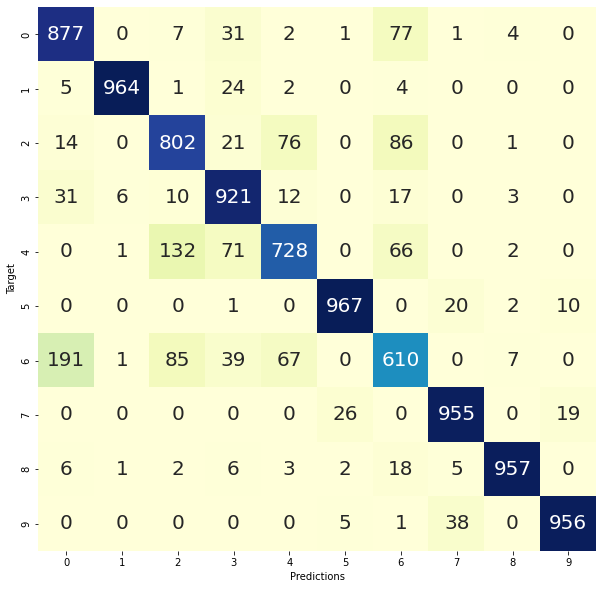

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

cm=confusion_matrix(test_labels, np.argmax(predictions,axis=1))
cm_df=pd.DataFrame(cm)
plt.figure(figsize=(10,10))
sns.heatmap(cm_df, annot=True, cmap= "YlGnBu", annot_kws={"size": 20}, cbar=False, fmt='g');
plt.xlabel('Predictions');
plt.ylabel('Target');

#K-Means

Es un algoritmo de Custering del tipo no supervisado. El objetivo de este algoritmo es encontrar “K” grupos (clusters) dentro de nuestros datos.

El algoritmo trabaja iterativamente para incluir a cada ejemplo de nuestra base de datos dentro de uno de los “K” grupos basado en la similitud de sus atributos.

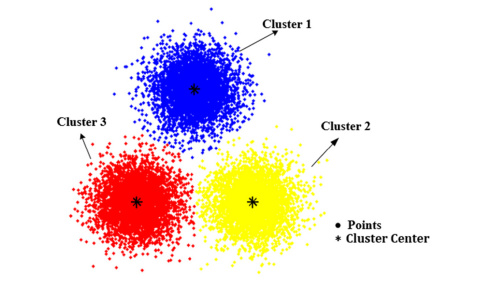

In [ ]:
import cv2
from google.colab.patches import cv2_imshow


#[OpenCV](https://docs.opencv.org/4.x/)

Es una librería para visión artificial de código abierto y que está disponible para muchos lenguajes de programación

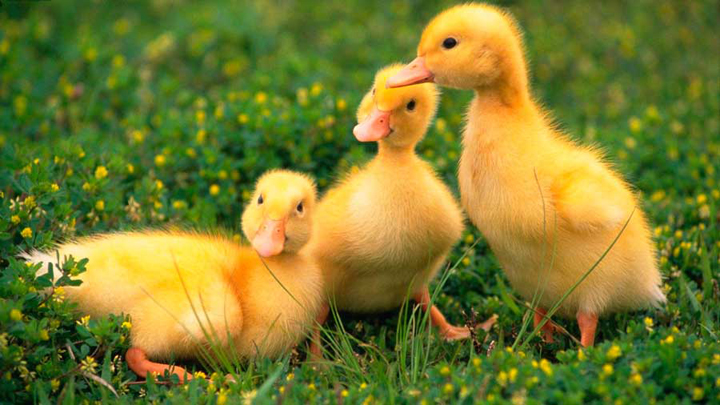

(405, 720, 3)

In [ ]:
patos = cv2.imread('/content/drive/MyDrive/Inteligencia Artificial/Materia/2023/patos.png')

cv2_imshow(patos)
patos.shape

Una imagen digital es una representación bidimensional de una imagen a partir de una matriz numérica

Las imágenes digitales están conformadas por píxeles (elementos de la matriz), y los píxeles están formados por las combinaciones de colores primarios (imágenes RGB).

Podemos pensar a un canal en este contexto, como una copia de la imagen del mismo tamaño que la imágen original, donde el valor de cada uno de sus pixels define la intensidad del color.

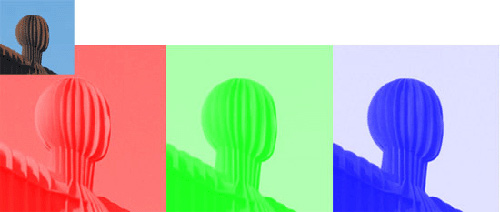

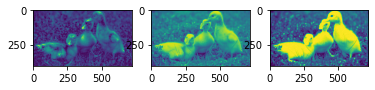

In [ ]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(nrows=1, ncols=3)
channel_red = patos[:,:,2]
channel_green = patos[:,:,1]
channel_blue = patos[:,:,0]
axs[0].imshow(channel_blue)
axs[1].imshow(channel_green)
axs[2].imshow(channel_red)
plt.show()

##Creando la base de datos

In [ ]:
dimensiones = patos.shape
pixels = dimensiones[0]*dimensiones[1]
pixels

291600

In [ ]:
import numpy as np
pixels= np.zeros([pixels,3], dtype='int')
pixels

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [ ]:
for fila in range(dimensiones[0]):
  for columna in range(dimensiones[1]):
    pixels[fila*dimensiones[1]+columna,0:3]=patos[fila,columna,:]
pixels

array([[14, 55, 24],
       [24, 67, 34],
       [19, 66, 28],
       ...,
       [22, 76, 16],
       [15, 69,  9],
       [ 9, 62,  5]])

#[Pandas ](https://pandas.pydata.org/)
Es una libreria que depende de de Numpy, esta librería añade un potente manejo matricial a Python. Los principales tipos de datos que pueden representarse con pandas son:
- Datos tabulares con columnas de tipo heterogéneo con etiquetas en columnas y filas.
-Series temporales.

Pandas proporciona herramientas que permiten:
- Leer y escribir datos en diferentes formatos: CSV, Microsoft Excel, bases SQL y formato HDF5
- Seleccionar y filtrar de manera sencilla tablas de datos en función de posición, valor o etiquetas
- Fusionar y unir datos
transformar datos aplicando funciones tanto en global como por ventanas
- Manipulación de series temporales
- Realizar gráficas

In [ ]:
import pandas as pd
pixels_df = pd.DataFrame(pixels, columns=['blue', 'green', 'red']) 
pixels_df

,blue,green,red
0,14,55,24
1,24,67,34
2,19,66,28
3,13,62,18
4,20,71,21
...,...,...,...
291595,22,73,16
291596,25,76,19
291597,22,76,16
291598,15,69,9


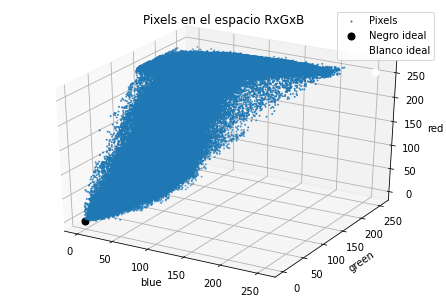

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig= plt.figure()
ax= Axes3D(fig)

atributos= ['blue', 'green', 'red']
x1=pixels_df[atributos[0]].values
x2=pixels_df[atributos[1]].values
x3=pixels_df[atributos[2]].values

ax.scatter(x1,x2,x3, s=1)
ax.scatter(0,0,0, c='black', s=50)
ax.scatter(255,255,255, c='white', s=50)
ax.set_xlabel(atributos[0])
ax.set_ylabel(atributos[1])
ax.set_zlabel(atributos[2])
ax.set_title('Pixels en el espacio RxGxB')
ax.legend(labels=('Pixels', 'Negro ideal', 'Blanco ideal'))
plt.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(pixels_df)
pixels_clusters = pixels_df.copy()
pixels_clusters['kmeans_group']=kmeans.labels_
pixels_clusters

,blue,green,red,kmeans_group
0,14,55,24,1
1,24,67,34,1
2,19,66,28,1
3,13,62,18,1
4,20,71,21,1
...,...,...,...,...
291595,22,73,16,1
291596,25,76,19,1
291597,22,76,16,1
291598,15,69,9,1


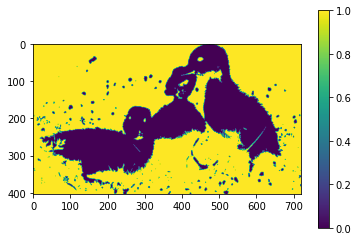

In [ ]:
a= patos.shape

clasif_patos= kmeans.labels_.reshape(a[0],a[1])

plt.imshow(clasif_patos)
plt.colorbar()
plt.show()